In [1]:
import datetime
import pytz
import pandas as pd
import matplotlib.pyplot as plt

### By default, datetime objects are not tz-aware

In [2]:
# Default datetime object
my_datetime = datetime.datetime(2022, 2, 8, 17, 10, 27)
print (my_datetime.tzname())

# Make a tz-aware datetime
my_datetime = datetime.datetime(2022, 2, 8, 17, 10, 27, tzinfo = pytz.utc)
print (my_datetime.tzname())

None
UTC


### Convert the datetime from UTC to Central time zone

In [3]:
my_datetime_cst = my_datetime.astimezone(pytz.timezone('US/Central'))
print(my_datetime_cst.strftime('%Y-%m-%d %H:%M:%S %Z%z'))

2022-02-08 11:10:27 CST-0600


### Change timezone in Pandas dataframes

There's a common pitfall to be aware of when changing timezones in Pandas dataframes. Simply setting the desired timezone does not seem to work as expected when plotting the data. The solution is to convert tz-aware datetime series to tz-unaware series.

In [4]:
my_df = pd.DataFrame()

# Generate a series of timestamps
my_df['Tz-unaware (UTC)'] = pd.date_range(start='2022-01-01 10:00:00', end='2022-01-03', freq='5H')

# Make the series tz-aware by assinging a timezone
my_df['Tz-aware (UTC)'] = my_df['Tz-unaware (UTC)'].apply(lambda x: x.tz_localize('UTC'))

# Convert series to Central time to UTC
my_df['Tz-aware (Central time)'] = my_df['Tz-aware (UTC)'].apply(lambda x: x.astimezone(pytz.timezone('US/Central')))

# Make the series tz-unaware
my_df['Tz-unaware (Central time)'] = my_df['Tz-aware (Central time)'].apply(lambda x: x.tz_localize(None))

my_df

,Tz-unaware (UTC),Tz-aware (UTC),Tz-aware (Central time),Tz-unaware (Central time)
0,2022-01-01 10:00:00,2022-01-01 10:00:00+00:00,2022-01-01 04:00:00-06:00,2022-01-01 04:00:00
1,2022-01-01 15:00:00,2022-01-01 15:00:00+00:00,2022-01-01 09:00:00-06:00,2022-01-01 09:00:00
2,2022-01-01 20:00:00,2022-01-01 20:00:00+00:00,2022-01-01 14:00:00-06:00,2022-01-01 14:00:00
3,2022-01-02 01:00:00,2022-01-02 01:00:00+00:00,2022-01-01 19:00:00-06:00,2022-01-01 19:00:00
4,2022-01-02 06:00:00,2022-01-02 06:00:00+00:00,2022-01-02 00:00:00-06:00,2022-01-02 00:00:00
5,2022-01-02 11:00:00,2022-01-02 11:00:00+00:00,2022-01-02 05:00:00-06:00,2022-01-02 05:00:00
6,2022-01-02 16:00:00,2022-01-02 16:00:00+00:00,2022-01-02 10:00:00-06:00,2022-01-02 10:00:00
7,2022-01-02 21:00:00,2022-01-02 21:00:00+00:00,2022-01-02 15:00:00-06:00,2022-01-02 15:00:00


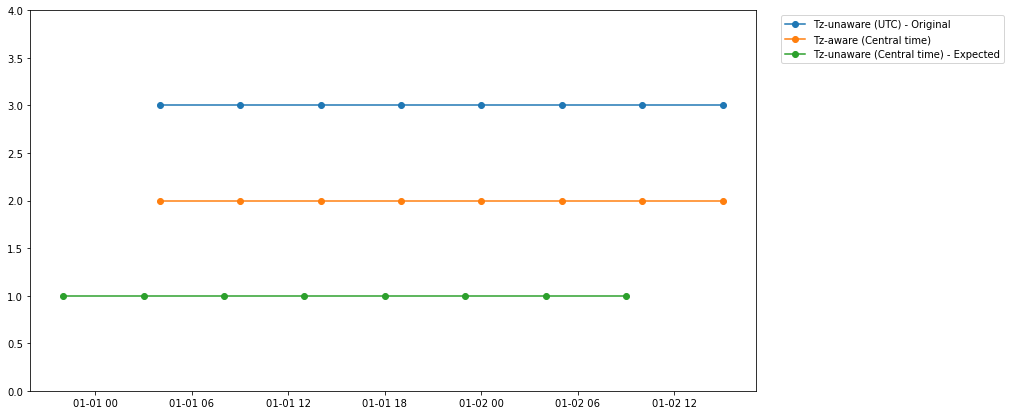

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(13,7))

ax.plot(my_df['Tz-unaware (UTC)'], [3 for i in range(len(my_df))], '-o', label='Tz-unaware (UTC) - Original')
ax.plot(my_df['Tz-aware (Central time)'],  [2 for i in range(len(my_df))], '-o', label='Tz-aware (Central time)')
ax.plot(my_df['Tz-unaware (Central time)'],  [1 for i in range(len(my_df))], '-o', label='Tz-unaware (Central time) - Expected')

ax.set_ylim(0, 4)

plt.legend(bbox_to_anchor=(1.35, 1))
plt.show()